In [20]:
import numpy as np
import pandas as pd

In [21]:
raw_results = np.load("current_results.npy")
#            results = tf.concat([tf.expand_dims(timestamp, axis=1), clearsky, outputs,
#                                 outputs_onehot, tf.expand_dims(penalty, axis=1), output_ghi], axis=1).numpy()
timestamp= ["timestamp"]
location = ["latitude", "longitude", "altitude"]
clearsky = ["clearsky_t0", "clearsky_t1", "clearsky_t3","clearsky_t6"]
logits = ["logit_0", "logit_1", "logit_2","logit_3", "logit_4"]
outputs = ["out0", "out1", "out3","out6"]
one_hot = ["onehot_0", "onehot_1", "onehot_2", "onehot_3", "onehot_4"]
one_hot = ["out_night","out_cloudy","out_slightly_cloudy", "out_clear", "out_variable"]
penalty = ["penalty"]
output_ghi = ["out_ghi_t0", "out_ghi_t1", "out_ghi_t3", "out_ghi_t6"]
adjusted_target_ghi = ["adj_target_ghi_t0", "adj_target_ghi_t1", "adj_target_ghi_t3", "adj_target_ghi_t6"]
target_ghi = ["target_ghi_t0", "target_ghi_t1", "target_ghi_t3", "target_ghi_t6"]
target_cloudiness = ["night","cloudy","slightly_cloudy", "clear", "variable"]
colonnes = {}
for i, nom in enumerate(timestamp + location + clearsky + outputs + target_cloudiness + adjusted_target_ghi + target_ghi + output_ghi):
    colonnes[i]=nom

#colonnes = {0: "timestamp", 1: "clearsky_t0", 2: "clearsky_t1", 3: "clearsky_t3", 4: "clearsky_t4", 
#            5: "logit_0", 6:"logit_1", 7:"logit_2", 8:"logit_3", 9:"logit_4", 
#            10: "onehot_0", 11: "onehot_1", 12: "onehot_2", 13: "onehot3", 14: "onehot_4", 
#            15: "penalty", 16: "ghi_t0", 17: "ghi_t1", 18:"ghi_t2", 19:"ghi_t3"}

In [22]:
données = pd.DataFrame(raw_results)
données

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.280514e+09,40.051922,-88.373093,230.0,539.005493,700.443237,890.308472,765.661987,1.0,1.0,...,0.833157,0.466542,297.253326,704.820007,741.766663,357.213348,539.005493,700.443237,890.308472,765.661987
1,1.341522e+09,40.051922,-88.373093,230.0,904.443420,930.302856,818.950439,334.577942,1.0,1.0,...,1.032932,0.925923,914.753357,939.359985,845.919983,309.793335,904.443420,930.302856,818.950439,334.577942
2,1.335560e+09,40.051922,-88.373093,230.0,865.664856,901.246216,796.799377,291.590515,1.0,1.0,...,0.628422,0.575442,672.413330,398.279999,500.726654,167.793335,865.664856,901.246216,796.799377,291.590515
3,1.343497e+09,40.051922,-88.373093,230.0,450.094421,627.102417,864.716003,822.874634,1.0,1.0,...,0.781104,0.861354,464.839996,678.086670,675.433350,708.786682,450.094421,627.102417,864.716003,822.874634
4,1.317315e+09,40.051922,-88.373093,230.0,93.654892,286.301086,605.731873,691.102173,1.0,1.0,...,1.005968,1.073300,77.546669,270.733337,609.346680,741.760010,93.654892,286.301086,605.731873,691.102173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.389128e+09,40.051922,-88.373093,230.0,324.781342,423.202728,452.211365,101.105812,1.0,1.0,...,0.666355,0.658188,336.693329,445.113342,301.333344,66.546669,324.781342,423.202728,452.211365,101.105812
252,1.343758e+09,40.051922,-88.373093,230.0,535.909180,697.689087,887.900818,762.708923,1.0,1.0,...,1.030363,1.101512,525.213318,606.500000,914.859985,840.133362,535.909180,697.689087,887.900818,762.708923
253,1.332007e+09,40.051922,-88.373093,230.0,320.472351,507.355194,746.710876,660.911072,1.0,1.0,...,0.769722,0.936223,153.633331,311.873322,574.760010,618.760010,320.472351,507.355194,746.710876,660.911072
254,1.304272e+09,40.051922,-88.373093,230.0,457.655151,636.556946,868.150879,798.517700,1.0,1.0,...,1.078507,0.243593,379.953339,662.773315,936.306641,194.513336,457.655151,636.556946,868.150879,798.517700


In [23]:
timestamp.append(clearsky)

In [24]:
données = pd.DataFrame(raw_results).rename(columns=colonnes)
données.head(2)

,timestamp,latitude,longitude,altitude,clearsky_t0,clearsky_t1,clearsky_t3,clearsky_t6,out0,out1,...,adj_target_ghi_t3,adj_target_ghi_t6,target_ghi_t0,target_ghi_t1,target_ghi_t3,target_ghi_t6,out_ghi_t0,out_ghi_t1,out_ghi_t3,out_ghi_t6
0,1.280514e+09,40.051922,-88.373093,230.0,539.005493,700.443237,890.308472,765.661987,1.0,1.0,...,0.833157,0.466542,297.253326,704.820007,741.766663,357.213348,539.005493,700.443237,890.308472,765.661987
1,1.341522e+09,40.051922,-88.373093,230.0,904.443420,930.302856,818.950439,334.577942,1.0,1.0,...,1.032932,0.925923,914.753357,939.359985,845.919983,309.793335,904.443420,930.302856,818.950439,334.577942


In [6]:
données[target_ghi + output_ghi].head(10)

,target_ghi_t0,target_ghi_t1,target_ghi_t3,target_ghi_t6,out_ghi_t0,out_ghi_t1,out_ghi_t3,out_ghi_t6
0,17.646667,151.806671,320.686676,386.160004,29.322830,110.561615,263.948456,564.201233
1,446.953339,621.366638,887.133362,914.366638,496.267181,288.658478,377.902039,0.162164
2,0.740000,108.413330,445.859985,888.573303,2.567149,46.237698,257.546417,363.035553
3,829.559998,820.366638,449.626678,322.993347,890.883911,775.093994,706.863586,-152.003433
4,130.786667,229.453339,182.893326,133.926666,-31.535330,693.797241,349.285309,211.979843
5,1022.466675,302.820007,587.739990,21.453333,403.655975,872.942810,-50.245659,134.792542
6,817.026672,789.493347,304.226654,49.980000,127.522995,787.489502,54.899178,81.257050
7,822.260010,827.726685,677.933350,166.673340,168.101974,954.536621,153.843658,125.372116
8,73.373337,121.513336,183.639999,68.513336,175.290054,267.223907,44.684059,81.739021
9,170.240005,354.153320,552.133362,804.013306,169.447266,289.831024,779.528687,322.384857


In [7]:
def rmse(données):
    rmse_t0 = np.sqrt(((données["out_ghi_t0"] - données["target_ghi_t0"])**2).sum()/len(données))
    rmse_t1 = np.sqrt(((données["out_ghi_t1"] - données["target_ghi_t1"])**2).sum()/len(données))
    rmse_t3 = np.sqrt(((données["out_ghi_t3"] - données["target_ghi_t3"])**2).sum()/len(données))
    rmse_t6 = np.sqrt(((données["out_ghi_t6"] - données["target_ghi_t6"])**2).sum()/len(données))
    print(rmse_t0, rmse_t1, rmse_t3, rmse_t6)
    print("mean=", np.mean([rmse_t0, rmse_t1, rmse_t3, rmse_t6]))

In [8]:
données

,timestamp,latitude,longitude,altitude,clearsky_t0,clearsky_t1,clearsky_t3,clearsky_t6,out0,out1,...,adj_target_ghi_t3,adj_target_ghi_t6,target_ghi_t0,target_ghi_t1,target_ghi_t3,target_ghi_t6,out_ghi_t0,out_ghi_t1,out_ghi_t3,out_ghi_t6
0,1.382206e+09,48.307831,-105.1017,634.0,28.852554,178.203873,440.259094,479.750031,1.016299,0.620422,...,0.728404,0.804919,17.646667,151.806671,320.686676,386.160004,29.322830,110.561615,263.948456,564.201233
1,1.310323e+09,48.307831,-105.1017,634.0,461.981689,625.608276,860.062927,873.916870,1.074214,0.461405,...,1.031475,1.046286,446.953339,621.366638,887.133362,914.366638,496.267181,288.658478,377.902039,0.162164
2,1.403277e+09,48.307831,-105.1017,634.0,2.017684,101.585625,447.662292,860.710510,1.272325,0.455160,...,0.995974,1.032372,0.740000,108.413330,445.859985,888.573303,2.567149,46.237698,257.546417,363.035553
3,1.275770e+09,48.307831,-105.1017,634.0,783.930908,877.692749,925.014954,646.324585,1.136432,0.883104,...,0.486075,0.499739,829.559998,820.366638,449.626678,322.993347,890.883911,775.093994,706.863586,-152.003433
4,1.395091e+09,48.307831,-105.1017,634.0,574.761963,650.609009,639.535645,255.213104,-0.054867,1.066381,...,0.285978,0.524764,130.786667,229.453339,182.893326,133.926666,-31.535330,693.797241,349.285309,211.979843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.365373e+09,48.307831,-105.1017,634.0,762.567566,778.588562,650.444153,163.054382,0.135051,1.253118,...,1.082594,0.754145,784.433350,835.226685,704.166687,122.966667,102.985359,975.663574,273.426392,161.109161
252,1.398361e+09,48.307831,-105.1017,634.0,234.524124,418.375793,716.029480,828.592590,0.986955,0.781347,...,0.507316,0.566487,244.366669,430.693329,363.253326,469.386658,231.464691,326.896667,754.665955,381.134888
253,1.410546e+09,48.307831,-105.1017,634.0,217.494003,394.337982,657.551880,687.547913,1.044387,0.765627,...,1.059790,1.072459,222.773331,409.093323,696.866638,737.366638,227.147873,301.915649,558.785522,586.923767
254,1.309620e+09,48.307831,-105.1017,634.0,0.677849,89.385284,433.274231,850.415100,0.796159,0.583112,...,0.977672,1.013066,0.820000,85.953331,423.600006,861.526672,0.539676,52.121670,183.919968,294.259247


In [11]:
def target_to_category(row):
    if row["night"]==1:
        return "night"
    if row["cloudy"]==1:
        return "cloudy"
    if row["slightly_cloudy"]==1:
        return "slightly_cloudy"
    if row["clear"]==1:
        return "clear"
    if row["variable"]==1:
        return "variable"
données["target_category"] = données.apply(target_to_category,axis=1)

In [13]:
df=données

In [14]:
clear = df[df["target_category"]=="clear"]
cloudy = df[df["target_category"]=="cloudy"]
slightly_cloudy = df[df["target_category"]=="slightly_cloudy"]
variable = df[df["target_category"]=="variable"]
night = df[df["target_category"]=="night"]

In [15]:
rmse(clear)
rmse(cloudy)
rmse(slightly_cloudy)
rmse(variable)
#rmse(night)

394.98232975201125 242.50019987368157 468.25490180159835 420.81325539764947
mean= 381.63767170623515
158.81955612723107 300.89547106435856 289.3797762967852 367.4724671108123
mean= 279.1418176497968
288.79328415946543 268.3047843723126 303.7432022726258 392.2785533452398
mean= 313.2799560374109
325.5793665345571 233.7319162965387 439.30624655343746 428.1120078955364
mean= 356.68238432001743


In [16]:
(cloudy["target_ghi_t0"].clip(0,1125)/cloudy["clearsky_t0"].clip(1,1125)).describe()

count    71.000000
mean      0.412108
std       0.420207
min       0.000000
25%       0.178428
50%       0.360249
75%       0.487582
max       2.326045
dtype: float64

In [17]:
(clear["target_ghi_t0"].clip(0,1125)/clear["clearsky_t0"].clip(1,1125)).describe()

count    98.000000
mean      0.987463
std       0.084864
min       0.561174
25%       0.967542
50%       1.000864
75%       1.031301
max       1.112589
dtype: float64

In [18]:
(slightly_cloudy["target_ghi_t0"].clip(0,1125)/slightly_cloudy["clearsky_t0"].clip(1,1125)).describe()

count    41.000000
mean      0.847494
std       0.211151
min       0.379065
25%       0.693508
50%       0.884401
75%       1.035997
max       1.179609
dtype: float64

In [19]:
(variable["target_ghi_t0"].clip(0,1125)/variable["clearsky_t0"].clip(1,1125)).describe()

count    46.000000
mean      0.731637
std       0.301392
min       0.000000
25%       0.575702
50%       0.789531
75%       0.908059
max       1.461248
dtype: float64

In [86]:
images = np.load("current_images.npy")

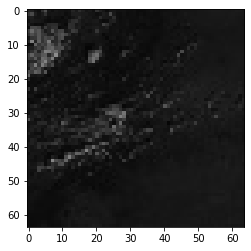

In [99]:
import matplotlib.pyplot as plt
image = images[80,:,:,0]
plt.imshow(image, cmap='gray', vmin = 0, vmax =255)

In [98]:
pd.DataFrame(image).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,7.343750,6.968750,6.390625,6.312500,6.750000,6.671875,6.375000,6.953125,6.203125,7.218750,...,7.859375,7.828125,7.828125,7.812500,8.156250,8.046875,7.921875,7.859375,7.937500,8.046875
std,6.149509,5.077084,3.619248,3.820891,3.804759,4.425951,3.860669,4.980692,3.867568,4.900498,...,0.499752,0.489726,0.489726,0.663684,0.510796,0.451793,0.481555,0.499752,0.431866,0.415176
min,3.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,...,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,8.000000,7.000000,7.250000,6.250000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,38.000000,29.000000,20.000000,26.000000,20.000000,27.000000,24.000000,27.000000,23.000000,29.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
